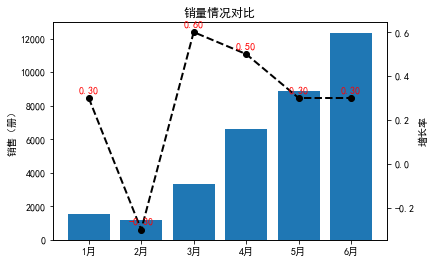

In [6]:
# 
import pandas as pd
import matplotlib.pyplot as plt 

# 读取Excel数据
df=pd.read_excel('mrbook.xlsx')

x=[i for i in range(1,7)]
y1=df['销量']

y2=df['rate']

#处理中文乱码
plt.rcParams['font.sans-serif']=['SimHei']

# 用来正常的显示负号
plt.rcParams['axes.unicode_minus']=False

fig=plt.figure() # 创建画布 

ax1=fig.add_subplot(1,1,1) # 1 行1列，在第一个区域绘图

# 设置图表的标题
plt.title('销量情况对比')


# 设置x轴标题
plt.xticks(x,[str(i)+'月'for i in range(1,7)])


# 绘制柱状图
ax1.bar(x,y1)

# 设置y轴标签
ax1.set_ylabel('销售（册）')

# 共享x轴，添加一条y轴坐标
ax2=ax1.twinx()

# 绘制折线图
ax2.plot(x,y2,color='black',linestyle='--',marker='o',linewidth=2)


# 设置y轴标签
ax2.set_ylabel('增长率')

# 添加文本

for a,b in zip(x,y2):
    plt.text(a,b+0.02,'%.2f'%b ,ha='center',va='bottom' ,fontsize=10,color='r')
plt.show()


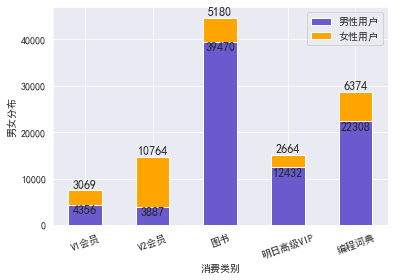

In [27]:
# 堆叠柱形图
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# 设置模式
sns.set_style('darkgrid')

# 解决中文乱码

plt.rcParams['font.sans-serif']=['SimHei']

# 读取Excel数据
df=pd.read_excel('mrtb_data.xlsx')

# 根据类别分组，计算每组中 买家实际支付金额 的总和
df1=df.groupby(['类别'])['买家实际支付金额'].sum()

# 将消费总金额转成列表
num=np.array(list(df1))


# 根据类别和性别分组，统计不同买家的人数，并重置索引
df2=df.groupby(['类别','性别'])['买家会员名'].count().reset_index()


#提取出男性的数据
men_df=df2[df2['性别']=='男']

women_df=df2[df2['性别']=='女']

#将男性，女性买家数转成列表
men_lst=list(men_df['买家会员名'])
women_lst=list(women_df['买家会员名'])


# 计算男性用户例
ratio=np.array(men_lst)/(np.array(men_lst)+np.array(women_lst))

# 设置输出的精度
np.set_printoptions(precision=2)

# 计算男女生的消费金额
men=num*ratio

women=num*(1-ratio)

# 删除 类别中 的重复数据

df3=df2.drop_duplicates(['类别'])


# 将类别转成列表
name=list(df3['类别'])


# 绘制图表
width=0.5

x=np.arange(len(name)) # [0,1,2,3,4]

# 男性柱状图


plt.bar(x,men,width=width,color='slateblue',label='男性用户')

# 女性的柱状图
plt.bar(x,women,width=width,color='orange',label='女性用户',bottom=men)


# 设置x轴与y轴的标签
plt.xlabel('消费类别')

plt.ylabel('男女分布')

plt.xticks(x,name,rotation=20)

# 在图表上显示数字
for a,b in zip(x,men):
    plt.text(a,b,'%.0f'%b ,ha='center',va='top',fontsize=12)

for a,b,c in zip(x,women,men):
    plt.text(a,b+c,'%.0f'%b ,ha='center',va='bottom',fontsize=12)

# 添加图例
plt.legend()
plt.show()

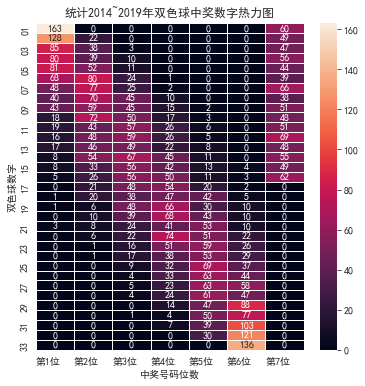

In [42]:
# 绘制双色球中奖号码
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#设置显示样式
sns.set_style('darkgrid')

df=pd.read_csv('data.csv',encoding='gb2312')

# 解决中文乱码

plt.rcParams['font.sans-serif']=['SimHei']

# 设置画布
plt.figure(figsize=(6,6))

series=df['中奖号码'].str.split('  ',expand=True)

# 对每一位中奖号码统计出现次数，（统计每一列中不同数字出现的次数）

df1=df.groupby(series[0]).size() # 第1个位置
df2=df.groupby(series[1]).size() # 第2个位置
df3=df.groupby(series[2]).size() # 第3个位置
df4=df.groupby(series[3]).size() # 第4个位置
df5=df.groupby(series[4]).size() # 第5个位置
df6=df.groupby(series[5]).size() # 第6个位置
df7=df.groupby(series[6]).size() # 第7个位置

# 横向合并
data=pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=1,sort=True)

# 空值处理，将NaN替换成0
data=data.fillna(0)

# 浮点数转成整数显示

data=data.round(0).astype(int)


# 绘制热力图
plt.title('统计2014~2019年双色球中奖数字热力图')

# 绘制 annot数值是否显示,fmt参数控制数据的格式,lw表示线宽

sns.heatmap(data,annot=True,fmt='d',lw=0.5)

#设置x轴与y轴的标签
plt.xlabel('中奖号码位数')
plt.ylabel('双色球数字')

plt.xticks(range(0,7),['第'+str(i)+'位'for i in range(1,8)],ha='left')
plt.show()

